## Ejercicio 3: 

Crea un script que genere 5 secuencias de 5 nucleótidos de forma aleatoria, que queden almacenadas en un archivo FASTA. 

A partir de ahí, cargue el archivo FASTA y genera los correspondientes árboles utilizando el método de máxima parsimonia y el método de distancia (selecciona la distancia que desees, y emplea UPGMA y el método Neighboor Joining). Compara los árboles/resultados y desarrolla alguna conclusión.

In [1]:
import random
from Bio import AlignIO
from generators.generatorTree import GeneratorTreeFactory

## 1. Generación de secuencias aleatorias

In [2]:
def generar_secuencia(longitud):
    nucleotidos = ['A', 'T', 'C', 'G']
    return ''.join(random.choice(nucleotidos) for _ in range(longitud))

def crear_fasta(nombre_archivo, num_secuencias, longitud):
    with open(nombre_archivo, 'w') as archivo:
        for i in range(1, num_secuencias + 1):
            secuencia = generar_secuencia(longitud)
            archivo.write(f">Secuencia_{i}\n")  # Encabezado FASTA
            archivo.write(f"{secuencia}\n")

In [3]:
nombre_archivo = "./fasta_files/secuencias.fasta"
num_secuencias = 5
longitud_secuencia = 5

crear_fasta(nombre_archivo, num_secuencias, longitud_secuencia)

print(f"Archivo {nombre_archivo} generado con {num_secuencias} secuencias de {longitud_secuencia} nucleótidos.")

Archivo ./fasta_files/secuencias.fasta generado con 5 secuencias de 5 nucleótidos.


## 2. Generación de árboles mediante el método de máxima parsimonia

In [4]:
def cargar_fasta(nombre_archivo):
    return AlignIO.read(nombre_archivo, "fasta")

In [5]:
sequences = cargar_fasta(nombre_archivo)

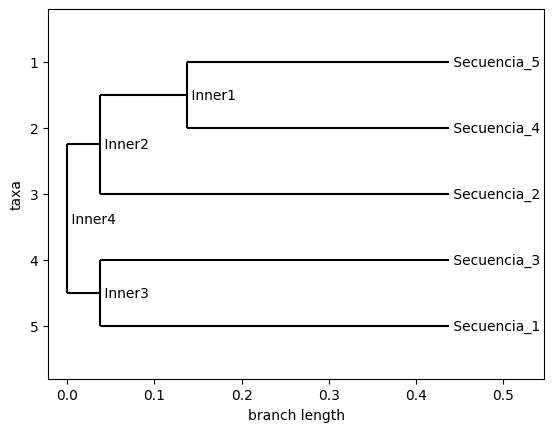

In [6]:
generator = GeneratorTreeFactory().initialize_generator('ParsimoniaTree')
tree_parsimonia = generator.generate_tree(sequences)
generator.show_tree(tree_parsimonia)

## 3. Generación de árboles mediante el método de distancia

In [7]:
generator = GeneratorTreeFactory().initialize_generator('DistanceTree')

### 3.1 UPGMA - Unweighted Pair Group Method with Arithmetic mean

#### 3.1.1. Cálculo de la distancia como la proporción de posiciones no idénticas entre dos secuencias - `identity`

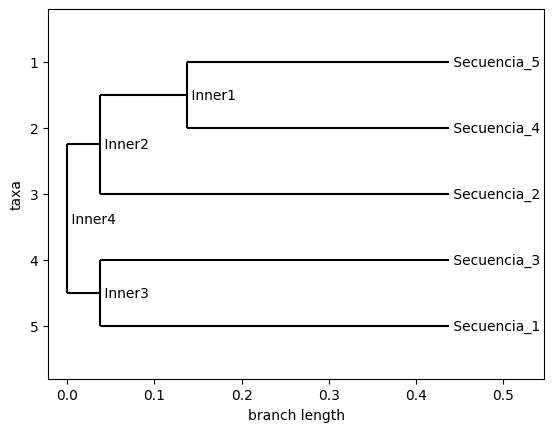

In [8]:
tree_upgma_identity = generator.generate_tree_upgma(sequences, 'identity')
generator.show_tree(tree_upgma_identity)

#### 3.1.2. Cálculo de la distancia utilizando herramientas como BLAST para determinar una distancia basada en alineamientos entre las secuencias. - `blastn`

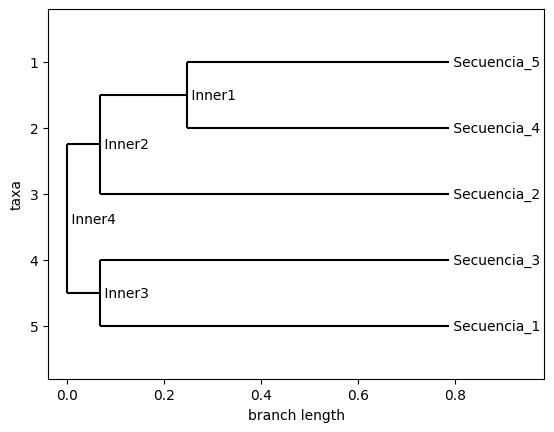

In [9]:
tree_upgma_blastn = generator.generate_tree_upgma(sequences, 'blastn')
generator.show_tree(tree_upgma_blastn)

#### 3.1.3. Cálculo de la distancia utilizando una matriz de puntuación para transiciones y transversiones que influye en cómo se calculan las distancias entre secuencias - `trans`

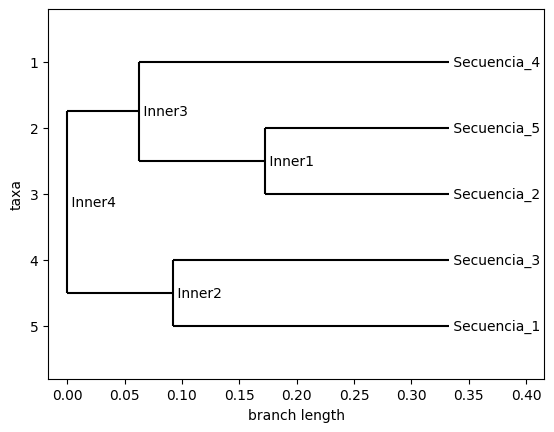

In [10]:
tree_upgma_trans = generator.generate_tree_upgma(sequences, 'trans')
generator.show_tree(tree_upgma_trans)

### 3.2 NJ - Neighboor Joining

#### 3.2.1. Cálculo de la distancia como la proporción de posiciones no idénticas entre dos secuencias - `identity`

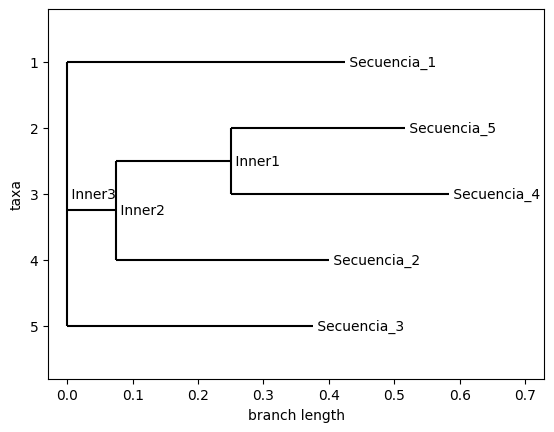

In [11]:
tree_nj_identitiy = generator.generate_tree_nj(sequences, 'identity')
generator.show_tree(tree_nj_identitiy)

#### 3.2.2. Cálculo de la distancia utilizando herramientas como BLAST para determinar una distancia basada en alineamientos entre las secuencias. - `blastn`

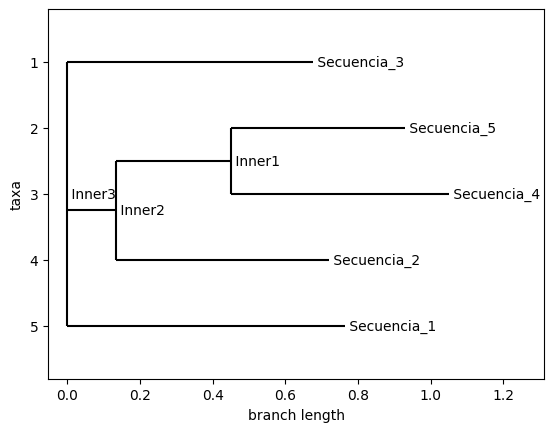

In [12]:
tree_nj_blastn = generator.generate_tree_nj(sequences, 'blastn')
generator.show_tree(tree_nj_blastn)

#### 3.2.3. Cálculo de la distancia utilizando una matriz de puntuación para transiciones y transversiones que influye en cómo se calculan las distancias entre secuencias - `trans`

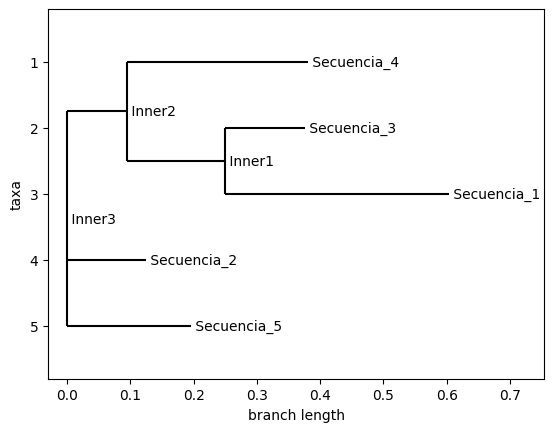

In [13]:
tree_nj_trans = generator.generate_tree_nj(sequences, 'trans')
generator.show_tree(tree_nj_trans)

## 4. Comaración de los árboles/resultados y conclusiones